# Observable Trends and Conclusions
* The total number of rides in rural areas is low when compared with urban areas, however the average fares are higher when compared with urban areas. Suburban areas seem to sit in between Urban and Rural for both total number of rides and average fares metrics.
* Total number of rides in Urban areas represents 68.4% of the total number of rides considering all cities. This also drives a high percentage of total fares (62.7%), even though the average fare is less in these areas.
* Urban contribution to total drivers is also high (80.9%) if compared with other city types. This might be an indication that the company needs to invest on increasing the number of drivers and use in Suburban and Rural cities.
-----

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# First we need to group the ride dataframe by city so to prepare city level data for the charts
ride_grouped = ride_df.groupby(["city"])

# Summarize total fare, average fare and total count; and create a new dataframe with results
ride_count = ride_grouped["ride_id"].count()
total_fare = ride_grouped["fare"].sum()
avg_fare = ride_grouped["fare"].mean()

summary_ride_df = pd.DataFrame({
    'ride_count': pd.Series(ride_count),
    'total_fare': pd.Series(total_fare),
    'avg_fare': pd.Series(avg_fare)
}).reset_index()

# Combine the summarized ride data and the city data into a single dataset
pyber_df = pd.merge(summary_ride_df, city_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,ride_count,total_fare,avg_fare,driver_count,type
0,Amandaburgh,18,443.55,24.641667,12,Urban
1,Barajasview,22,557.31,25.332273,26,Urban
2,Barronchester,16,582.76,36.422500,11,Suburban
3,Bethanyland,18,593.21,32.956111,22,Suburban
4,Bradshawfurt,10,400.64,40.064000,7,Rural


## Bubble Plot of Ride Sharing Data

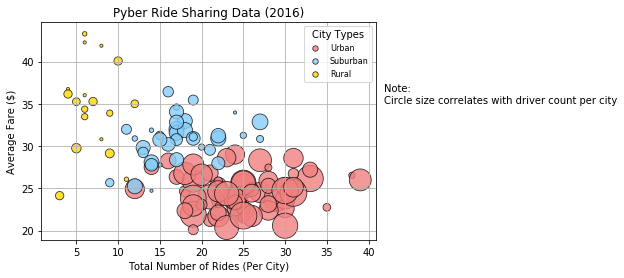

In [2]:
# Obtain the x and y coordinates for each of the three city types
x_urb = pyber_df.loc[pyber_df["type"] == "Urban" , ["ride_count"]]
y_urb = pyber_df.loc[pyber_df["type"] == "Urban" , ["avg_fare"]]
x_sub = pyber_df.loc[pyber_df["type"] == "Suburban" , ["ride_count"]]
y_sub = pyber_df.loc[pyber_df["type"] == "Suburban" , ["avg_fare"]]
x_rur = pyber_df.loc[pyber_df["type"] == "Rural" , ["ride_count"]]
y_rur = pyber_df.loc[pyber_df["type"] == "Rural" , ["avg_fare"]]
s_urb = pyber_df.loc[pyber_df["type"] == "Urban" , ["driver_count"]]
s_sub = pyber_df.loc[pyber_df["type"] == "Suburban" , ["driver_count"]]
s_rur = pyber_df.loc[pyber_df["type"] == "Rural" , ["driver_count"]]

# Build the scatter plots for each city types
plt.scatter(x_urb, y_urb, s=s_urb*10, color="#F08080", edgecolor="black", linewidths=0.8, alpha=0.8, label="Urban")
plt.scatter(x_sub, y_sub, s=s_sub*10, color="#87CEFA", edgecolor="black", linewidths=0.8, alpha=0.8, label="Suburban")
plt.scatter(x_rur, y_rur, s=s_rur*10, color="#FFD700", edgecolor="black", linewidths=0.8, alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title="City Types", fontsize=8)
for handle in legend.legendHandles:
    handle.set_sizes([30])

# Incorporate a text label regarding circle size
plt.gcf().text(0.92, 0.6, "Note:\nCircle size correlates with driver count per city")


# Save Figure
plt.savefig("bubble_plot.png")
plt.show()

## Total Fares by City Type

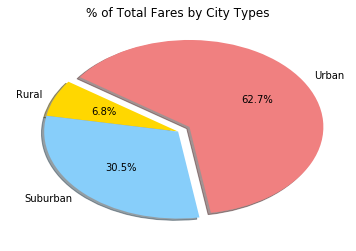

In [3]:
# Labels, colors and explode options for next 3 pie charts
pie_labels = ["Rural","Suburban","Urban"]
colors = ["#FFD700","#87CEFA","#F08080"]
explode = (0,0,0.1)

# Calculate Type Percents
pie_total_fares = pyber_df.groupby("type")["total_fare"].sum()

# Build Pie Chart
plt.pie(pie_total_fares, explode=explode, labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Fares by City Types")

# Save Figure
plt.savefig("pie_total_fares.png")
plt.show()

## Total Rides by City Type

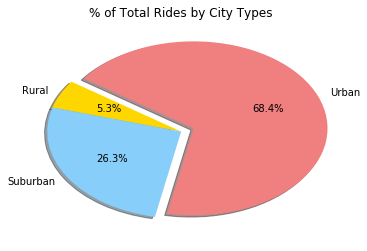

In [4]:
# Calculate Type Percents
pie_total_rides = pyber_df.groupby("type")["ride_count"].sum()

# Build Pie Chart
plt.pie(pie_total_rides, explode=explode, labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Types")

# Save Figure
plt.savefig("pie_total_rides.png")
plt.show()

## Total Drivers by City Type

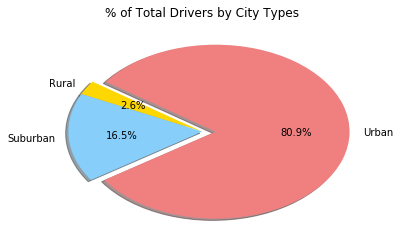

In [5]:
# Calculate Type Percents
pie_total_drivers = pyber_df.groupby("type")["driver_count"].sum()

# Build Pie Chart
plt.pie(pie_total_drivers, explode=explode, labels=pie_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Drivers by City Types")

# Save Figure
plt.savefig("pie_total_drivers.png")
plt.show()